In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

import math
import numpy as np
from PIL import Image
import keras2onnx

import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
INFO:tensorflow:Disabling tensor equality


## Reading training data

In [2]:
shape_root = 'shapes/shapes'
shape_names = ['circle/','square/','star/','triangle/']
shape_class_labels = np.array([0, 1, 2, 3])

In [3]:
# Read in data from shapes_root and form into numpy array
N = sum([len(files) for _, _, files in os.walk(shape_root)])-1
count = 0

X = np.zeros((N,32,32,1)) # 3D array of x,y,#images of shape (N,32,32)
Y = np.zeros(N) # vector of class labels



for label,shape_name in enumerate(shape_names):
    shape_path = os.path.join(shape_root,shape_name)

    num = 0
    image_path = os.path.join(shape_path,f'{num}.png')
    while os.path.isfile(image_path):
        img = Image.open(image_path)
        X[count,:,:,0] = np.array(img.resize((32,32))) # downsample image to 32x32 #,resample=Image.NEAREST)
        Y[count] = label
        num += 1
        count += 1
        image_path = os.path.join(shape_path,f'{num}.png')
Y_onehot = tf.keras.utils.to_categorical(Y,num_classes=4,dtype='float32')

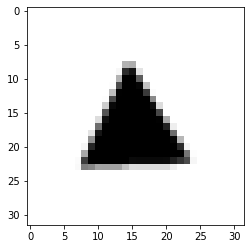

14970

In [4]:
# Split into testing/training TODO
plt.imshow(X[14961,:,:,0],cmap='gray')
plt.show()
N

## Model definition

In [5]:

model = keras.Sequential()
model.add(layers.Input(shape=(32,32,1)))
model.add(layers.Conv2D(6,5,activation='relu'))   # 6 filters with 5x5 kernal; outputs 6@28x28
model.add(layers.MaxPooling2D((2,2)))             # max pooling with 2x2 pool size; outputs 6@14x14
model.add(layers.Conv2D(16,5,activation='relu'))  # 16 filters with 5x5 kernal; outputs 16@10x10
model.add(layers.MaxPooling2D((2,2)))             # max pooling with 2x2 pool size; outputs 16@5x5
model.add(layers.Conv2D(120,5,activation='relu')) # 120 filters with 5x5 kernal; outputs 120@1x1
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='relu'))    # fully connected layer; outputs 84
model.add(layers.Dense(4, activation='relu'))     # fully connected layer; outputs 4
model.add(layers.Softmax())

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                1

## Training

In [6]:
X.shape

(14970, 32, 32, 1)

In [7]:
Y.shape

(14970,)

In [9]:
# Compile and fit model
opt = Adam(learning_rate=.01)
model.compile(loss="categorical_crossentropy", optimizer= opt, metrics= ["accuracy"])
model.fit(
    X,Y_onehot,
    batch_size=1000,
    epochs=1,
    validation_split=.1
)

# Save as ONNX
onnx_model = keras2onnx.convert_keras(model)
keras2onnx.save_model(onnx_model,'model.onnx')

14/14 [==============================] - 2s 144ms/step - loss: 1.3863 - accuracy: 0.2734 - val_loss: 1.3863 - val_accuracy: 0.0000e+00


tf executing eager_mode: True
tf.keras model eager_mode: False


AttributeError: 'KerasTensor' object has no attribute 'graph'

## Testing

In [ ]:
# Display output of network on a query image 
# (will eventually be copied to another file)
